Ch13 聊聊NumPy
# 生成数组
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import cm 

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 自定义可视化函数

In [2]:
def visualize_2D(array, title, vmax, vmin):
    
    fig_width  = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块
    
    sns.heatmap(array, 
                vmax = vmax,
                vmin = vmin,
                annot = True,      # 增加注释
                fmt = ".0f",       # 注释数值的格式
                square = True,     # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5,   # 方格线宽
                cbar = False,      # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax)           # 指定绘制热图的轴
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 定义绘制一元数组可视化函数

def visualize_1D(array, title):
    fig, ax = plt.subplots()

    colors = cm.RdYlBu_r(np.linspace(0,1,len(array)))

    for idx in range(len(array)):

        circle_idx = plt.Circle((idx, 0), 0.5, facecolor=colors[idx], edgecolor = 'w')
        ax.add_patch(circle_idx)
        ax.text(idx, 0, s = str(array[idx]),
                horizontalalignment = 'center',
                verticalalignment = 'center')

    ax.set_xlim(-0.6, 0.6 + len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    fig.savefig('Figures/' + title + '.svg', format='svg')


## 手动

### 一维

In [3]:
a_1D = np.array([-3, -2, -1, 0, 1, 2, 3])
a_1D

array([-3, -2, -1,  0,  1,  2,  3])

In [4]:
a_1D.shape

(7,)

In [5]:
len(a_1D)

7

In [6]:
a_1D.ndim

1

In [7]:
a_1D.size

7

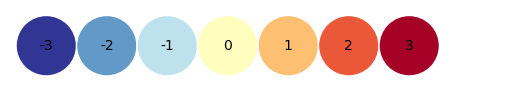

In [8]:
visualize_1D(a_1D, '手动，一维')

In [9]:
# 取出第一个元素
a_1D[0]

-3

In [10]:
# 取出最后一个元素
a_1D[-1]

3

### 二维

In [11]:
a_2D = np.array([[-3, -2, -1],
                 [0,  1,  2]])
a_2D

array([[-3, -2, -1],
       [ 0,  1,  2]])

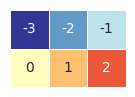

In [12]:
visualize_2D(a_2D, '手动，二维', 3, -3)

In [13]:
a_2D.shape

(2, 3)

In [14]:
a_2D.shape[0]
# 行数

2

In [15]:
a_2D.shape[1]
# 列数

3

In [16]:
a_2D.ndim

2

In [17]:
a_2D.size

6

In [18]:
len(a_2D)

2

### 二维，行向量

In [19]:
a_row_vector = np.array([[-3, -2, -1, 0, 1, 2, 3]])
# 两层中括号
a_row_vector

array([[-3, -2, -1,  0,  1,  2,  3]])

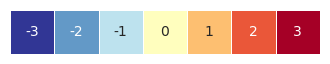

In [20]:
visualize_2D(a_row_vector, '手动，行向量', 3, -3)

In [21]:
a_row_vector.shape

(1, 7)

In [22]:
a_row_vector.ndim

2

In [23]:
len(a_row_vector)

1

In [24]:
a_row_vector.size

7

### 二维，列向量

In [25]:
a_col_vector = np.array([[-3], [-2], [-1], [0], [1], [2], [3]])
a_col_vector

array([[-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3]])

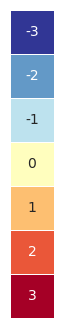

In [26]:
visualize_2D(a_col_vector, '手动，列向量', 3, -3)

In [27]:
a_col_vector.shape

(7, 1)

In [28]:
a_col_vector.ndim

2

In [29]:
a_col_vector.size

7

In [30]:
len(a_col_vector)

7

### 三维

In [31]:
a_3D = np.array([[[-12, -11, -10, -9],
                  [-8,  -7,  -6,  -5],
                  [-4,  -3,  -2,  -1]],
                 [[0,   1,   2,   3],
                  [4,   5,   6,   7],
                  [8,   9,   10,  11]]])
a_3D

array([[[-12, -11, -10,  -9],
        [ -8,  -7,  -6,  -5],
        [ -4,  -3,  -2,  -1]],

       [[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]]])

In [32]:
a_3D.shape

(2, 3, 4)

In [33]:
a_3D.ndim

3

In [34]:
a_3D[0]

array([[-12, -11, -10,  -9],
       [ -8,  -7,  -6,  -5],
       [ -4,  -3,  -2,  -1]])

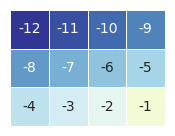

In [35]:
visualize_2D(a_3D[0], '手动，三维，第一页', 12, -12)

In [36]:
a_3D[0].shape

(3, 4)

In [37]:
a_3D[1]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

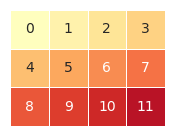

In [38]:
visualize_2D(a_3D[1], '手动，三维，第二页', 12, -12)

### 三维，行向量

In [39]:
a_row_vector_3D = np.array([[[-3, -2, -1, 0, 1, 2, 3]]])
a_row_vector_3D

array([[[-3, -2, -1,  0,  1,  2,  3]]])

In [40]:
a_row_vector_3D.shape

(1, 1, 7)

In [41]:
a_row_vector_3D.ndim

3

## list 到数组

In [42]:
list_1D = [-3, -2, -1, 0, 1, 2, 3]
list_1D

[-3, -2, -1, 0, 1, 2, 3]

In [43]:
np.array(list_1D)

array([-3, -2, -1,  0,  1,  2,  3])

In [44]:
list_2D = [[-3, -2, -1, 0, 1, 2, 3]]
list_2D

[[-3, -2, -1, 0, 1, 2, 3]]

In [45]:
np.array(list_2D)

array([[-3, -2, -1,  0,  1,  2,  3]])

In [46]:
list_3D = [[[-3, -2, -1, 0, 1, 2, 3]]]
list_3D

[[[-3, -2, -1, 0, 1, 2, 3]]]

In [47]:
np.array(list_3D)

array([[[-3, -2, -1,  0,  1,  2,  3]]])

## 数列

### 使用numpy.arange()

In [48]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [49]:
np.arange(5, dtype = float)

array([0., 1., 2., 3., 4.])

In [50]:
np.arange(10,20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [51]:
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

In [52]:
np.arange(10,20,2, dtype = float)

array([10., 12., 14., 16., 18.])

### 使用numpy.linspace()

In [53]:
np.linspace(0, 10, 21) 

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

### 使用numpy.logspace()

In [54]:
np.logspace(0, 4, 5, base=10) 

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

In [55]:
np.logspace(0, 4, 5, base=2) 

array([ 1.,  2.,  4.,  8., 16.])

In [56]:
[n**2 for n in np.arange(8)]

[0, 1, 4, 9, 16, 25, 36, 49]

## 网格数据

In [57]:
x1_array = np.linspace(-3, 3, 61)
x2_array = np.linspace(-3, 3, 61)

xx1, xx2 = np.meshgrid(x1_array, x2_array)

In [58]:
xx1

array([[-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       ...,
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ]])

In [59]:
xx1.shape

(61, 61)

In [60]:
xx1.ndim

2

In [61]:
xx2

array([[-3. , -3. , -3. , ..., -3. , -3. , -3. ],
       [-2.9, -2.9, -2.9, ..., -2.9, -2.9, -2.9],
       [-2.8, -2.8, -2.8, ..., -2.8, -2.8, -2.8],
       ...,
       [ 2.8,  2.8,  2.8, ...,  2.8,  2.8,  2.8],
       [ 2.9,  2.9,  2.9, ...,  2.9,  2.9,  2.9],
       [ 3. ,  3. ,  3. , ...,  3. ,  3. ,  3. ]])

In [62]:
xxx1, xxx2, xxx3 = np.meshgrid(np.arange(6), np.arange(6), np.arange(6))

In [63]:
xxx1

array([[[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5

In [64]:
xxx1.shape

(6, 6, 6)

In [65]:
xxx1.ndim

3

### 特殊矩阵

In [66]:
np.empty([4,4])

array([[0.00000000e+000, 4.94065646e-324, 2.12199579e-314,
        2.12199579e-314],
       [4.24399158e-314, 4.24399158e-314, 6.36598737e-314,
        6.36598737e-314],
       [8.48798316e-314, 8.48798316e-314, 1.06099790e-313,
        1.06099790e-313],
       [1.27319747e-313, 1.27319747e-313, 1.48539705e-313,
        1.48539705e-313]])

In [67]:
np.empty(4)

array([2.12199579e-314, 6.36598737e-314, 1.06099790e-313, 1.48539705e-313])

In [68]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
np.empty_like(A)

array([[0, 1, 2],
       [3, 4, 5]])

In [69]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [70]:
np.full((3,3), np.inf)

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [71]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
np.full_like(A, 100)

array([[100, 100, 100],
       [100, 100, 100]])

In [72]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [73]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [74]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
np.ones_like(A)

array([[1, 1, 1],
       [1, 1, 1]])

In [75]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [76]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [77]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
np.zeros_like(A)

array([[0, 0, 0],
       [0, 0, 0]])

## 随机数

### 二元连续均匀随机数

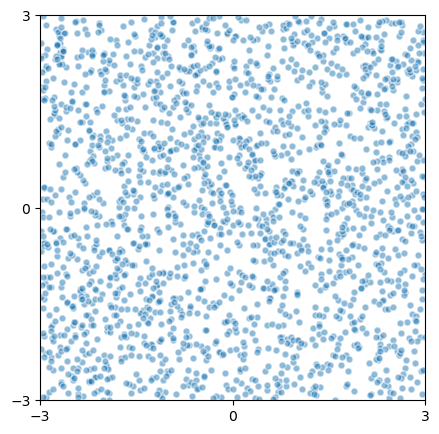

In [78]:
# 二元，服从连续均匀分布
num = 2000
# 2000 个散点
X_uniform = np.random.uniform(low=-3, high=3, size=(num,2))

fig, ax = plt.subplots(figsize = (5,5))
plt.scatter(X_uniform[:,0],  # 散点横轴坐标
            X_uniform[:,1],  # 散点纵轴坐标
            s = 100,         # 散点大小
            marker = '.',    # 散点marker样式
            alpha = 0.5,     # 透明度
            edgecolors = 'w')# 散点边缘颜色

ax.set_aspect('equal', adjustable='box')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
ax.set_xticks((-3,0,3))
ax.set_yticks((-3,0,3))
fig.savefig('Figures/二元连续均匀随机数.svg', format='svg')


### 二元正态分布随机数

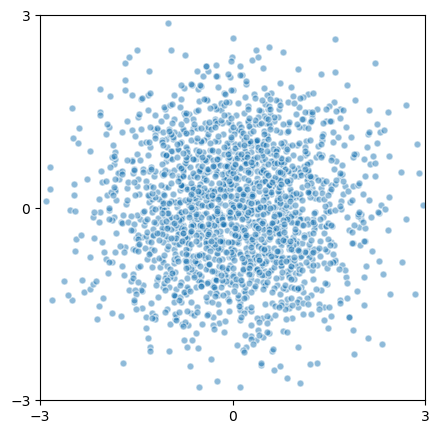

In [79]:
# 二元，服从连续均匀分布
num = 2000
# 2000 个散点

mu = np.array([0, 0])
Sigma = np.array([[1, 0], 
                  [0, 1]])

X_binormal = np.random.multivariate_normal(mu, Sigma, size=num)

fig, ax = plt.subplots(figsize = (5,5))
plt.scatter(X_binormal[:,0], 
            X_binormal[:,1], 
            s = 100, 
            marker = '.', 
            alpha = 0.5, 
            edgecolors = 'w')

ax.set_aspect('equal', adjustable='box')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
ax.set_xticks((-3,0,3))
ax.set_yticks((-3,0,3))
fig.savefig('Figures/二元正态分布随机数.svg', format='svg')


## CSV文件导出、导入

In [81]:
from sklearn.datasets import load_iris

iris = load_iris()

np.savetxt("Iris_data.csv", iris.data, delimiter=",")
# 将numpy array存成CSV文件

In [82]:
from numpy import genfromtxt
Iris_Data_array = genfromtxt('Iris_data.csv', delimiter=',')
Iris_Data_array
# 将 CSV 文件读入成numpy array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

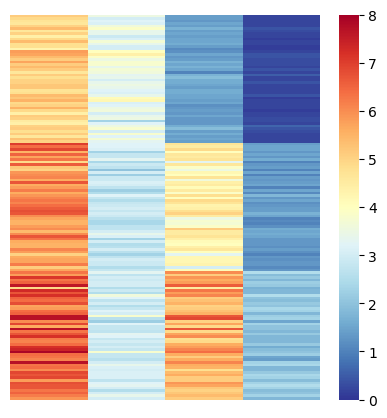

In [83]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(Iris_Data_array,   # 鸢尾花数据数组
            cmap = 'RdYlBu_r', # 指定色谱
            ax = ax,           # 指定轴
            vmax = 8,          # 色谱最大值
            vmin = 0,          # 色谱最小值
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据热图.svg', format='svg')

## 推荐阅读

NumPy最权威的综述，请参考：  
https://www.nature.com/articles/s41586-020-2649-2  
MATLAB用户，使用NumPy之前请先阅读：  
https://numpy.org/doc/stable/user/numpy-for-matlab-users.html  
更多NumPy练习题，大家可以参考：  
https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_with_solutions.md  
NumPy中的英文术语：  
https://numpy.org/doc/stable/glossary.html

In [84]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023